In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import pickle
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE

# Parameters

In [2]:
TF1 = 1
TF2 = 2
TF3 = 3
NTest = 96
NVal = 100
T1 = 7
D = 15

In [3]:
def split_X_Y(ar, T, TF):
  X = []
  Y = []
  for t in range(len(ar) - T - TF + 1):
    x = ar[t : t + T, 0: -1]
    X.append(x)
    y = ar[t + T : t + T + TF, -1:]
    Y.append(y)

  X = np.array(X).astype(float) 
  if TF == 1:
    Y = np.array(Y).astype(float).reshape(len(Y), )
  else:
    Y = np.array(Y).astype(float).reshape(len(Y), TF)
  print("X.shape", X.shape, "Y.shape", Y.shape) 
  return X, Y

In [4]:
def feature_selection(x_train, y_train):
  rfe = RFE(RandomForestRegressor(), n_features_to_select=18)
  fit = rfe.fit(x_train.reshape(len(x_train),D*T1), y_train)
  important_features = list()
  for i in range(len(fit.support_)):
      if fit.support_[i]:
          important_features.append(i)
  result = np.array(important_features)
  calMostFeature = [0]*D
  for i in result:
    calMostFeature[i%D] = calMostFeature[i%D] + 1
  print(calMostFeature)
  return calMostFeature

In [5]:
from sklearn.metrics import accuracy_score,mean_absolute_error,mean_squared_error, r2_score
from statistics import mean 

In [6]:
def deviation_function(y, pred):
  deviation = []
  for i in range(0, len(y)):
    deviation.append(abs(pred[i] - y[i]) / y[i])
  return mean(deviation)
def deviation_function_inv(y, pred):
  deviation = []
  for i in range(0, len(y)):
    deviation.append(abs(pred[i] - y[i]) / y[i])
  return mean(np.array(deviation).mean(axis=1))
def evaluation(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df
def evaluation_inv(y, pred, name_model):
    #mean squared error
    mse=mean_squared_error(y, pred)     
    #mean absolute error     
    mae=mean_absolute_error(y, pred)  
    #root mean squared error      
    rmse=np.sqrt(mean_squared_error(y, pred))
    #r2 score
    r2 = r2_score(y, pred)
    #deviation
    deviation = deviation_function_inv(y, pred)
    print(f'mse: {mse}')
    print(f'mae: {mae}')
    print(f'rmse: {rmse}')
    print(f"R-Squared: {r2}")
    print(f"Deviation: {deviation}")
    measure_df =pd.DataFrame({"mse": mse,"mae": mae,"rmse": rmse, "r2": r2, 'deviation': deviation},index=[name_model])
    return measure_df

# Normalization Dataset

In [7]:
df_normalize = pd.read_csv("G:/My Drive/IS6102.CH1701/Result/Dataset/normalization.csv", parse_dates=['Date'], index_col=0)
df_normalize.head(5)

,Gold_Close,Oil_Close,Volume_Top2,Volume_Top3,Volume_Top4,Volume_Top5,X1,X2,X3,X4,X5,X6,X7,X8,X9,Y
Date,,,,,,,,,,,,,,,,
2020-03-12,0.195054,0.428501,0.252108,0.035745,0.666943,0.028726,0.090175,0.096398,0.215437,0.385386,0.294139,0.478063,0.760187,0.813189,0.055378,0.000000
2020-03-13,0.066875,0.429926,0.236596,0.038759,0.662361,0.030444,0.023122,0.096398,0.145379,0.473294,0.327844,0.241249,0.699492,0.549101,0.038502,0.009472
2020-03-14,0.066875,0.429926,0.224523,0.036015,0.668942,0.030070,0.027929,0.096398,0.153463,0.453264,0.315684,0.060818,0.682915,0.560035,0.160002,0.003668
2020-03-15,0.066875,0.429926,0.241015,0.036838,0.654064,0.026986,0.015865,0.096398,0.129212,0.405045,0.227655,0.267530,0.500701,0.355787,0.267800,0.006734
2020-03-16,0.014977,0.411145,0.231549,0.033910,0.652156,0.028229,0.012953,0.096398,0.129212,0.416914,0.271336,0.282272,0.733482,0.526008,0.069977,0.000698


In [8]:
ar_original_minmax = df_normalize.to_numpy()
ar_original_minmax

array([[0.195054  , 0.4285006 , 0.25210841, ..., 0.81318927, 0.05537789,
        0.        ],
       [0.06687549, 0.42992625, 0.23659559, ..., 0.5491007 , 0.03850218,
        0.00947215],
       [0.06687549, 0.42992625, 0.22452314, ..., 0.56003522, 0.16000223,
        0.00366761],
       ...,
       [0.66997559, 0.70854771, 0.19900319, ..., 0.73869017, 0.08532489,
        0.24308976],
       [0.66997559, 0.70854771, 0.19728917, ..., 0.7039487 , 0.07841119,
        0.25020148],
       [0.66997559, 0.70854771, 0.20929626, ..., 0.50852748, 0.11842803,
        0.27466851]])

## Sliding Windows

In [9]:
x11_original_minmax, y11_original_minmax = split_X_Y(ar_original_minmax, T1, TF1)

X.shape (1089, 7, 15) Y.shape (1089,)


## Train Val Test

In [10]:
x11_original_minmax_train, y11_original_minmax_train = x11_original_minmax[:-NTest], y11_original_minmax[: -NTest]
x11_original_minmax_test, y11_original_minmax_test = x11_original_minmax[-NTest:], y11_original_minmax[-NTest:]

In [11]:
print(x11_original_minmax_train.shape, y11_original_minmax_train.shape )
print(x11_original_minmax_test.shape, y11_original_minmax_test.shape )

(993, 7, 15) (993,)
(96, 7, 15) (96,)


## Feature Section

In [12]:
top_idx = np.loadtxt(f"G:/My Drive/IS6102.CH1701/Result/FeatureSelection/{T1}_{TF1}.csv", dtype=int)
top_idx

array([0, 1, 3, 6, 7, 8])

In [13]:
NFeature = len(top_idx)
NFeature 

6

In [14]:
x11_original_minmax_train = x11_original_minmax_train[:,:,top_idx]
x11_original_minmax_test = x11_original_minmax_test[:,:,top_idx]

In [15]:
print(x11_original_minmax_train.shape)
print(x11_original_minmax_test.shape)

(993, 7, 6)
(96, 7, 6)


## Build The Model

### SARIMAX

https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html

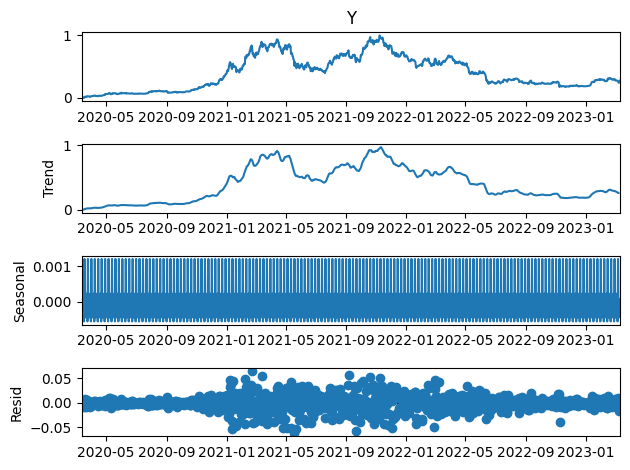

In [19]:
# from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df_normalize["Y"])
result.plot()
pyplot.show()

In [20]:
import statsmodels.api as sm

In [21]:
sarimax_mod = sm.tsa.statespace.SARIMAX(y11_original_minmax_train, exog = x11_original_minmax_train.reshape(len(x11_original_minmax_train),NFeature*T1))
sarimax_fit = sarimax_mod.fit()

c:\Users\UYEN\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [79]:
sarimax_pred = sarimax_fit.predict(start = 1, end = len(y11_original_minmax_test), exog = x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))

In [80]:
evaluation(y11_original_minmax_test, sarimax_pred, "SARIMAX")

mse: 0.03619507387370069
mae: 0.18752728105830554
rmse: 0.19025002989145806
R-Squared: -15.605720761975782
Deviation: 0.7605898667768917


,mse,mae,rmse,r2,deviation
SARIMAX,0.036195,0.187527,0.19025,-15.605721,0.76059


### Linear Regression

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [81]:
#linear regression model
from sklearn.linear_model import LinearRegression 
#Grid search model
from sklearn.model_selection import GridSearchCV         

In [82]:
parameters = {
    'fit_intercept':[True,False], 
    'copy_X':[True, False]
    }

In [83]:
lr_mod = GridSearchCV(LinearRegression(),parameters, scoring='r2', cv=None)
lr_fit = lr_mod.fit(x11_original_minmax_train.reshape(len(x11_original_minmax_train),NFeature*T1), y11_original_minmax_train)

In [84]:
lr_pred = lr_mod.predict(x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))

In [85]:
evaluation(y11_original_minmax_test, lr_pred, "Linear Regression")

mse: 0.003946197524658873
mae: 0.05561141013316157
rmse: 0.06281876729655615
R-Squared: -0.8104522840523591
Deviation: 0.22404109559597296


,mse,mae,rmse,r2,deviation
Linear Regression,0.003946,0.055611,0.062819,-0.810452,0.224041


In [86]:
df_lr_para = pd.DataFrame(lr_mod.best_params_, index=[0])
df_lr_para.to_csv(f"G:/My Drive/IS6102.CH1701/Result/LR_parameter/{T1}_{TF1}.csv")

### XGBoost Regression

https://stackabuse.com/bytes/end-to-end-xgboost-regression-pipeline-with-scikit-learn/
https://xgboost.readthedocs.io/en/stable/

In [ ]:
# !pip install xgboost

In [172]:
from xgboost import XGBRegressor 

In [173]:
parameters = {
    'n_estimators': [80, 90, 100, 125, 150,200,1000,2000,3000, 3500],
    'max_depth': [2,3,4,5,8,16,None],
    'learning_rate': np.arange(0.1, 1, 0.1)
}

In [174]:
xgbr_mod = GridSearchCV(XGBRegressor(),parameters, scoring='r2', cv=None)
xgbr_fit = xgbr_mod.fit(x11_original_minmax_train.reshape(len(x11_original_minmax_train),NFeature*T1), y11_original_minmax_train)

In [175]:
xgbr_pred = xgbr_mod.predict(x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))

In [176]:
evaluation(y11_original_minmax_test, xgbr_pred, "XGBoost Regression")

mse: 0.0011893135944425334
mae: 0.028330507795512643
rmse: 0.034486426234716365
R-Squared: 0.4543619522190193
Deviation: 0.10996868000234238


,mse,mae,rmse,r2,deviation
XGBoost Regression,0.001189,0.028331,0.034486,0.454362,0.109969


In [177]:
xgbr_mod.best_params_

{'learning_rate': 0.6, 'max_depth': 3, 'n_estimators': 90}

In [178]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])

In [179]:
df_xgbr_para = pd.DataFrame(xgbr_mod.best_params_, index=[0])
df_xgbr_para.to_csv(f"G:/My Drive/IS6102.CH1701/Result/XBG_parameter/{T1}_{TF1}.csv")

### Long Short Term Memory

In [ ]:
# !pip install -q -U keras-tuner

In [ ]:
# !python -m pip uninstall tensorflow-macos
# !python -m pip uninstall tensorflow-metal

In [ ]:
# conda install -c apple tensorflow-deps --force-reinstall

In [ ]:
# conda install -c apple tensorflow-deps --force-reinstall

In [ ]:
# !pip install tensorflow

In [ ]:
# !pip install numpy

In [ ]:
# !pip install numpy --upgrade 

In [ ]:
# !pip install keras_tuner

In [131]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, Input, Bidirectional
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [132]:
def LSTM_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(LSTM(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(LSTM(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF1, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [ ]:
# BayesianOptimization
# Hyperband

In [137]:
lstm_tuner = kt.BayesianOptimization(LSTM_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=300,
                                     project_name='LSTM_orignal_x11_y11')

In [138]:
lstm_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [139]:
lstm_tuner.search(x11_original_minmax_train, y11_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x11_original_minmax_test, y11_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Trial 10 Complete [00h 00m 18s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 04m 12s
INFO:tensorflow:Oracle triggered exit


In [140]:
lstm_best_hps = lstm_tuner.get_best_hyperparameters(num_trials=1)[0]

In [141]:
lstm_best_hps

In [142]:
print(lstm_best_hps.get('layer_1'))
print(lstm_best_hps.get('layer_2'))
print(lstm_best_hps.get('layer_3'))
print(lstm_best_hps.get('layer_4'))
print(lstm_best_hps.get('layer_5'))
print(lstm_best_hps.get('learning_rate'))
print(lstm_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

15
15
15
15
5
0.001
relu
0.4


In [143]:
lstm_para = []
lstm_para.append(lstm_best_hps.get('layer_1'))
lstm_para.append(lstm_best_hps.get('layer_2'))
lstm_para.append(lstm_best_hps.get('layer_3'))
lstm_para.append(lstm_best_hps.get('layer_4'))
lstm_para.append(lstm_best_hps.get('layer_5'))
lstm_para.append(lstm_best_hps.get('learning_rate'))
lstm_para.append(lstm_best_hps.get('activation'))
lstm_para.append(lstm_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/IS6102.CH1701/Result/LSTM_parameter/{T1}_{TF1}.csv", np.array(lstm_para), delimiter=",", fmt="%s")

In [144]:
lstm_para

[15, 15, 15, 15, 5, 0.001, 'relu', 0.4]

In [145]:
lstm_mod = lstm_tuner.hypermodel.build(lstm_best_hps)
lstm_history = lstm_mod.fit(x11_original_minmax_train, y11_original_minmax_train, 
                  epochs=300, 
                  batch_size = 5,
                  validation_data=(x11_original_minmax_test, y11_original_minmax_test), 
                  callbacks=[lstm_stop_early])

Epoch 1/300
159/159 [==============================] - 5s 9ms/step - loss: 0.1207 - mae: 0.2823 - val_loss: 0.0032 - val_mae: 0.0457
Epoch 2/300
159/159 [==============================] - 1s 6ms/step - loss: 0.0721 - mae: 0.2214 - val_loss: 0.0119 - val_mae: 0.0988
Epoch 3/300
159/159 [==============================] - 1s 7ms/step - loss: 0.0565 - mae: 0.1946 - val_loss: 0.0340 - val_mae: 0.1765
Epoch 4/300
159/159 [==============================] - 1s 7ms/step - loss: 0.0426 - mae: 0.1677 - val_loss: 0.0230 - val_mae: 0.1437
Epoch 5/300
159/159 [==============================] - 1s 7ms/step - loss: 0.0432 - mae: 0.1656 - val_loss: 0.0329 - val_mae: 0.1745
Epoch 6/300
159/159 [==============================] - 1s 8ms/step - loss: 0.0340 - mae: 0.1523 - val_loss: 0.0537 - val_mae: 0.2269


In [146]:
lstm_pred = lstm_mod.predict(x11_original_minmax_test)

3/3 [==============================] - 0s 3ms/step


In [149]:
y11_original_minmax_test.shape

(96,)

In [152]:
lstm_pred.flatten().shape

(96,)

In [160]:
evaluation(y11_original_minmax_test, lstm_pred.flatten(), "Long Short Term Memory")

mse: 0.05345942727764234
mae: 0.22895162064466032
rmse: 0.2312129479022365
R-Squared: -23.526329869234093
Deviation: 0.9844567576722406


,mse,mae,rmse,r2,deviation
Long Short Term Memory,0.053459,0.228952,0.231213,-23.52633,0.984457


### Gate Recurrent Unit

In [161]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Dropout
from tensorflow.keras.losses import MeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
import keras_tuner as kt 


In [162]:
def GRU_Model(hp):
  hp_layer_1 = hp.Int('layer_1', min_value = 5, max_value = 16, step=5)
  hp_layer_2 = hp.Int('layer_2', min_value = 5, max_value = 16, step=5)
  hp_layer_3 = hp.Int('layer_3', min_value = 5, max_value = 16, step=5)
  hp_layer_4 = hp.Int('layer_4', min_value = 5, max_value = 16, step=5)
  hp_layer_5 = hp.Int('layer_5', min_value = 5, max_value = 16, step=5)
  hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3])
  hp_activation = hp.Choice('activation', values=['relu','tanh'])
  hp_dropout = hp.Choice('dropout', values=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
  model = Sequential()
  model.add(GRU(units=hp_layer_1, activation= hp_activation, input_shape = (T1, NFeature), return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_2, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_3, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_4, activation= hp_activation, return_sequences=True))
  model.add(Dropout(hp_dropout))
  model.add(GRU(units=hp_layer_5, activation= hp_activation, return_sequences=False))
  model.add(Dropout(hp_dropout))
  model.add(Dense(units=TF1, activation='linear'))

  model.compile(optimizer=Adam(learning_rate=hp_learning_rate),
                loss="mse",
                metrics=["mae"])
  
  return model

In [163]:
gru_tuner = kt.BayesianOptimization(GRU_Model, objective='mean_squared_error', 
                                     max_consecutive_failed_trials=20,
                                     project_name='GRU_orignal_x11_y11')

In [164]:
gru_stop_early = EarlyStopping(monitor='val_loss', patience=5)

In [165]:
gru_tuner.search(x11_original_minmax_train, y11_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x11_original_minmax_test, y11_original_minmax_test), 
                  callbacks=[gru_stop_early])

Trial 10 Complete [00h 00m 21s]

Best mean_squared_error So Far: None
Total elapsed time: 00h 05m 16s
INFO:tensorflow:Oracle triggered exit


In [166]:
gru_best_hps = gru_tuner.get_best_hyperparameters(num_trials=1)[0]

In [167]:
print(gru_best_hps.get('layer_1'))
print(gru_best_hps.get('layer_2'))
print(gru_best_hps.get('layer_3'))
print(gru_best_hps.get('layer_4'))
print(gru_best_hps.get('layer_5'))
print(gru_best_hps.get('learning_rate'))
print(gru_best_hps.get('activation'))
print(lstm_best_hps.get('dropout'))

5
5
5
10
10
0.001
tanh
0.4


In [168]:
gru_para = []
gru_para.append(gru_best_hps.get('layer_1'))
gru_para.append(gru_best_hps.get('layer_2'))
gru_para.append(gru_best_hps.get('layer_3'))
gru_para.append(gru_best_hps.get('layer_4'))
gru_para.append(gru_best_hps.get('layer_5'))
gru_para.append(gru_best_hps.get('learning_rate'))
gru_para.append(gru_best_hps.get('activation'))
gru_para.append(gru_best_hps.get('dropout'))
np.savetxt(f"G:/My Drive/IS6102.CH1701/Result/GRU_parameter/{T1}_{TF1}.csv", np.array(gru_para), delimiter=",", fmt="%s")

In [169]:
gru_mod = gru_tuner.hypermodel.build(gru_best_hps)
gru_history = gru_mod.fit(x11_original_minmax_train, y11_original_minmax_train, 
                  epochs=200, 
                  batch_size = 5,
                  validation_data=(x11_original_minmax_test, y11_original_minmax_test), 
                  callbacks=[gru_stop_early])

Epoch 1/200
159/159 [==============================] - 13s 24ms/step - loss: 0.0869 - mae: 0.2451 - val_loss: 0.0432 - val_mae: 0.1985
Epoch 2/200
159/159 [==============================] - 2s 12ms/step - loss: 0.0400 - mae: 0.1645 - val_loss: 0.0450 - val_mae: 0.1982
Epoch 3/200
159/159 [==============================] - 2s 13ms/step - loss: 0.0308 - mae: 0.1438 - val_loss: 0.0386 - val_mae: 0.1827
Epoch 4/200
159/159 [==============================] - 2s 14ms/step - loss: 0.0274 - mae: 0.1343 - val_loss: 0.0144 - val_mae: 0.1030
Epoch 5/200
159/159 [==============================] - 2s 15ms/step - loss: 0.0253 - mae: 0.1260 - val_loss: 0.0139 - val_mae: 0.1042
Epoch 6/200
159/159 [==============================] - 2s 14ms/step - loss: 0.0214 - mae: 0.1170 - val_loss: 0.0238 - val_mae: 0.1463
Epoch 7/200
159/159 [==============================] - 2s 13ms/step - loss: 0.0201 - mae: 0.1121 - val_loss: 0.0063 - val_mae: 0.0693
Epoch 8/200
159/159 [==============================] - 2s 13m

In [170]:
gru_pred = gru_mod.predict(x11_original_minmax_test)

3/3 [==============================] - 2s 4ms/step


In [171]:
evaluation(y11_original_minmax_test, gru_pred.flatten(), "Gate Recurrent Unit")

mse: 0.0030633138876095365
mae: 0.048431285060933284
rmse: 0.055347212103316785
R-Squared: -0.4053993977585846
Deviation: 0.1830864876907325


,mse,mae,rmse,r2,deviation
Gate Recurrent Unit,0.003063,0.048431,0.055347,-0.405399,0.183086


## Evaluate

In [180]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [186]:
y_test_inv = scaler_single.inverse_transform(y11_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [187]:
sarimax_df = evaluation_inv(y_test_inv, y_sarimax, "SARIMAX")
lr_df = evaluation_inv(y_test_inv, y_lr, "Linear Regression")
xgbr_df = evaluation_inv(y_test_inv, y_xgbr, "XGBoost Regression")
lstm_df = evaluation_inv(y_test_inv, y_lstm, "Long Short Term Memory")
gru_df = evaluation_inv(y_test_inv, y_gru, "Gate Recurrent Unit")

mse: 141821863.20983934
mae: 11738.46519354222
rmse: 11908.898488518547
R-Squared: -15.605720761975778
Deviation: 0.5712265960943917
mse: 15462244.599749908
mae: 3481.0540553241085
rmse: 3932.20607289978
R-Squared: -0.8104522840523591
Deviation: 0.1685944026592681
mse: 4660044.313764888
mae: 1773.3774820963542
rmse: 2158.7135784454795
R-Squared: 0.45436202245970747
Deviation: 0.08354674086421315
mse: 209468207.10285196
mae: 14331.466451009115
rmse: 14473.016517051721
R-Squared: -23.52633519921453
Deviation: 0.7284908793504595
mse: 12002871.4749522
mae: 3031.6064351399727
rmse: 3464.5160520557847
R-Squared: -0.40539919264798074
Deviation: 0.1401712558330318


In [188]:
df_evaluation = pd.concat([sarimax_df, lr_df, xgbr_df, lstm_df, gru_df]) 
df_evaluation

,mse,mae,rmse,r2,deviation
SARIMAX,1.418219e+08,11738.465194,11908.898489,-15.605721,0.571227
Linear Regression,1.546224e+07,3481.054055,3932.206073,-0.810452,0.168594
XGBoost Regression,4.660044e+06,1773.377482,2158.713578,0.454362,0.083547
Long Short Term Memory,2.094682e+08,14331.466451,14473.016517,-23.526335,0.728491
Gate Recurrent Unit,1.200287e+07,3031.606435,3464.516052,-0.405399,0.140171


In [189]:
df_evaluation.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Evaluation/evaluation_original_{T1}_{TF1}.csv")

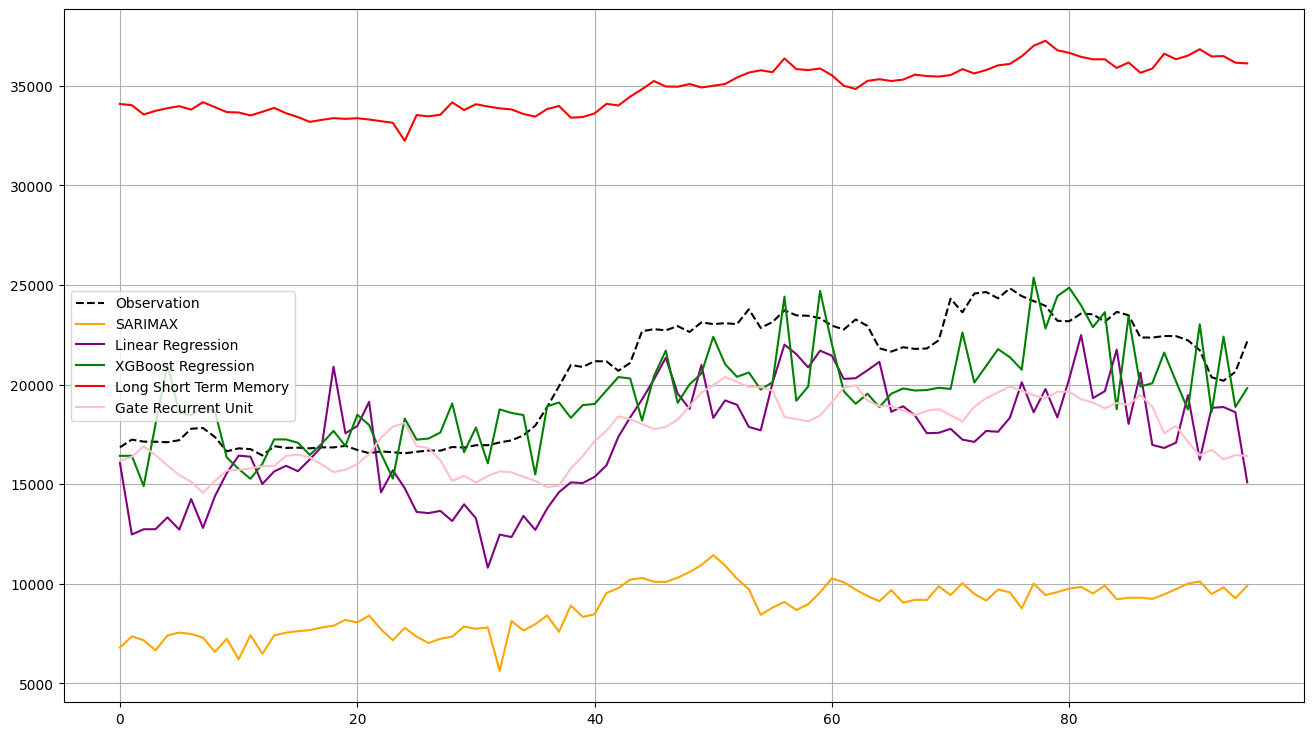

In [190]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.plot(y_test_inv, 'black', label='Observation', linestyle='dashed')
plt.plot(y_sarimax, 'orange', label='SARIMAX')
plt.plot(y_lr, 'purple', label=f'Linear Regression')
plt.plot(y_xgbr, 'green', label=f'XGBoost Regression')
plt.plot(y_lstm, 'red', label=f'Long Short Term Memory')
plt.plot(y_gru, 'pink', label=f'Gate Recurrent Unit')
plt.legend()
plt.savefig(f'G:/My Drive/IS6102.CH1701/Result/Image/{T1}_{TF1}.png')

## Save Model

In [191]:
from tensorflow.keras.models import load_model

In [22]:
import pickle
# Other
sarimax_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
pickle.dump(sarimax_fit, open(sarimax_filename, 'wb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
pickle.dump(lr_mod, open(lr_filename, 'wb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
pickle.dump(xgbr_mod, open(xgbr_filename, 'wb'))
#### Keras
lstm_mod.save(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod.save(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

# Draft

In [15]:
from tensorflow.keras.models import load_model

In [16]:
import pickle
# Other
sarimax_filename =  f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
sarimax_mod = pickle.load(open(sarimax_filename, 'rb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

In [17]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [18]:
sarimax_pred = sarimax_mod.predict(start = 1, end = len(y11_original_minmax_test), exog = x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x11_original_minmax_test)
gru_pred = gru_mod.predict(x11_original_minmax_test)

3/3 [==============================] - 1s 3ms/step


In [19]:
y_test_inv = scaler_single.inverse_transform(y11_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [20]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [21]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1089,)


In [22]:
date_test = date_array[-NTest:]
date_test = date_test

In [23]:
y_test_inv = y_test_inv.reshape(len(y_test_inv), )
y_sarimax = y_sarimax.reshape(len(y_sarimax), )
y_lr = y_lr.reshape(len(y_lr), )
y_xgbr = y_xgbr.reshape(len(y_xgbr), )
y_lstm = y_lstm.reshape(len(y_lstm), )
y_gru = y_gru.reshape(len(y_gru), )


In [24]:
detail = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax,
    "Y_LR": y_lr,
    "Y_XGBR": y_xgbr,
    "Y_LSTM": y_lstm,
    "Y_GRU": y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.head(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2022-12-07,16848.126953,6802.675430,16063.503647,16420.513672,34080.839844,16179.407227
2022-12-08,17233.474609,7358.296180,12472.383441,16421.593750,34018.441406,16370.860352
2022-12-09,17133.152344,7165.480250,12734.426062,14903.213867,33553.078125,16897.812500
2022-12-10,17128.724609,6656.711452,12739.476299,18018.884766,33737.296875,16454.402344
2022-12-11,17104.193359,7405.089485,13332.488281,20997.214844,33867.117188,15932.641602


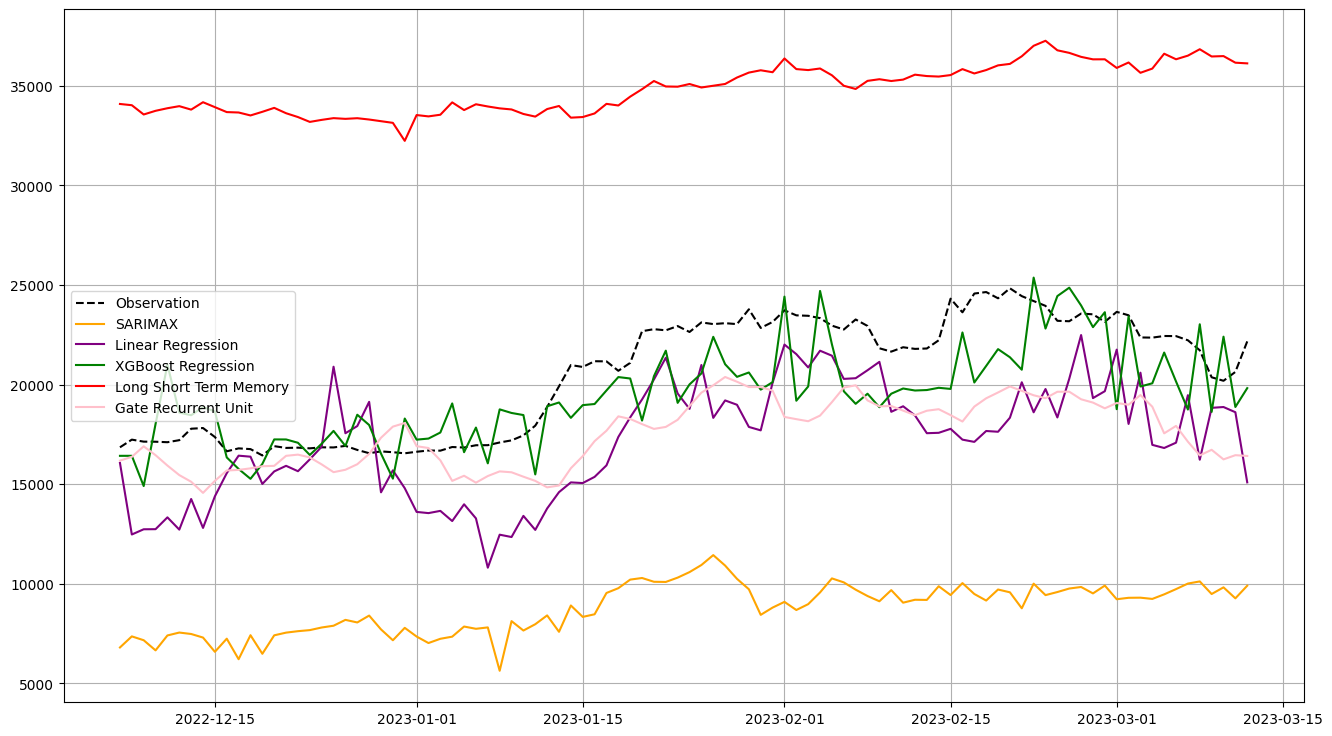

In [25]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.plot(df['Y_test'], 'black', label='Observation', linestyle='dashed')
plt.plot(df['Y_SARIMAX'], 'orange', label='SARIMAX')
plt.plot(df["Y_LR"], 'purple', label=f'Linear Regression')
plt.plot(df["Y_XGBR"], 'green', label=f'XGBoost Regression')
plt.plot(df["Y_LSTM"], 'red', label=f'Long Short Term Memory')
plt.plot(df["Y_GRU"], 'pink', label=f'Gate Recurrent Unit')
plt.legend()
plt.savefig(f'G:/My Drive/IS6102.CH1701/Result/Image/{T1}_{TF1}.png')

# Draft

In [16]:
from tensorflow.keras.models import load_model

In [17]:
import pickle
# Other
sarimax_filename =  f'G:/My Drive/IS6102.CH1701/Result/Model/sarimax_original_{T1}_{TF1}.h5'
sarimax_mod = pickle.load(open(sarimax_filename, 'rb'))
lr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/lr_original_{T1}_{TF1}.h5'
lr_mod = pickle.load(open(lr_filename, 'rb'))
xgbr_filename = f'G:/My Drive/IS6102.CH1701/Result/Model/xgbr_original_{T1}_{TF1}.h5'
xgbr_mod = pickle.load(open(xgbr_filename, 'rb'))
#### Keras
lstm_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/lstm_original_{T1}_{TF1}.h5')
gru_mod = load_model(f'G:/My Drive/IS6102.CH1701/Result/Model/gru_original_{T1}_{TF1}.h5')

In [18]:
import joblib
scaler_single_filename = "G:/My Drive/IS6102.CH1701/Result/Dataset/scaler_single.save"
scaler_single = joblib.load(scaler_single_filename) 

In [19]:
sarimax_pred = sarimax_mod.predict(start = 1, end = len(y11_original_minmax_test), exog = x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))
lr_pred = lr_mod.predict(x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))
xgbr_pred = xgbr_mod.predict(x11_original_minmax_test.reshape(len(x11_original_minmax_test),NFeature*T1))
lstm_pred = lstm_mod.predict(x11_original_minmax_test)
gru_pred = gru_mod.predict(x11_original_minmax_test)

3/3 [==============================] - 1s 1ms/step


In [20]:
y_test_inv = scaler_single.inverse_transform(y11_original_minmax_test.reshape(-1, 1))
y_sarimax = scaler_single.inverse_transform(sarimax_pred.reshape(-1, 1))
y_lr = scaler_single.inverse_transform(lr_pred.reshape(-1, 1))
y_xgbr = scaler_single.inverse_transform(xgbr_pred.reshape(-1, 1))
y_lstm = scaler_single.inverse_transform(lstm_pred.flatten().reshape(-1, 1))
y_gru = scaler_single.inverse_transform(gru_pred.flatten().reshape(-1, 1))

In [79]:
date_index = np.array(df_normalize.index)
print(type(date_index))
date_index = date_index.reshape(-1, 1)
date_index

<class 'numpy.ndarray'>


array([['2020-03-12T00:00:00.000000000'],
       ['2020-03-13T00:00:00.000000000'],
       ['2020-03-14T00:00:00.000000000'],
       ...,
       ['2023-03-10T00:00:00.000000000'],
       ['2023-03-11T00:00:00.000000000'],
       ['2023-03-12T00:00:00.000000000']], dtype='datetime64[ns]')

In [80]:
date_array = []
for t in range(len(date_index) - T1 - TF1 + 1):
    date_value = date_index[t + T1 : t + T1 + TF1, :]
    date_array.append(date_value)
date_array = np.array(date_array).reshape(len(date_array), )
print("date.shape", date_array.shape) 

date.shape (1089,)


In [82]:
date_array[-TF1]

numpy.datetime64('2023-03-12T00:00:00.000000000')

In [83]:
i = 0
while i < TF1:
    date_array = np.append(date_array, date_array[-1] + np.timedelta64(1,'D')) 
    i = i + 1
date_array[-TF1]

numpy.datetime64('2023-03-13T00:00:00.000000000')

In [84]:
date_test = date_array[-NTest:]
date_test[-TF1]

numpy.datetime64('2023-03-13T00:00:00.000000000')

In [85]:
y_test_inv = y_test_inv.reshape(len(y_test_inv), )
y_sarimax = y_sarimax.reshape(len(y_sarimax), )
y_lr = y_lr.reshape(len(y_lr), )
y_xgbr = y_xgbr.reshape(len(y_xgbr), )
y_lstm = y_lstm.reshape(len(y_lstm), )
y_gru = y_gru.reshape(len(y_gru), )


In [86]:
detail_sarima = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax
}
df_sarima = pd.DataFrame(detail_sarima, columns = ["Date", "Y_test","Y_SARIMAX"])
df_sarima.set_index("Date", inplace = True)
df_sarima.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_SARIMAX.csv")

In [87]:
detail_lr = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_LR": y_lr
}
df_lr = pd.DataFrame(detail_lr, columns = ["Date", "Y_test","Y_LR"])
df_lr.set_index("Date", inplace = True)
df_lr.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_LR.csv")

In [88]:
detail_XGRB = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_XGBR": y_xgbr
}
df_XGRB = pd.DataFrame(detail_XGRB, columns = ["Date", "Y_test","Y_XGRB"])
df_XGRB.set_index("Date", inplace = True)
df_XGRB.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_XGRB.csv")

In [89]:
detail_LSTM = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_LSTM": y_lstm
}
df_LSTM = pd.DataFrame(detail_LSTM, columns = ["Date", "Y_test","Y_LSTM"])
df_LSTM.set_index("Date", inplace = True)
df_LSTM.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_LSTM.csv")

In [90]:
detail_GRU = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_GRU": y_gru
}
df_GRU = pd.DataFrame(detail_GRU, columns = ["Date", "Y_test","Y_GRU"])
df_GRU.set_index("Date", inplace = True)
df_GRU.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_GRU.csv")

In [91]:
detail = {
    "Date" : date_test,
    "Y_test": y_test_inv,
    "Y_SARIMAX": y_sarimax,
    "Y_LR": y_lr,
    "Y_XGBR": y_xgbr,
    "Y_LSTM": y_lstm,
    "Y_GRU": y_gru
}
df = pd.DataFrame(detail, columns = ["Date", "Y_test","Y_SARIMAX", "Y_LR", "Y_XGBR", "Y_LSTM", "Y_GRU"])
df.set_index("Date", inplace = True)
df.to_csv(f"G:/My Drive/IS6102.CH1701/Result/Truc_WebVisualization/predict_1_day/{T1}_days_{TF1}_day_ALL.csv")

In [92]:
df.tail(5)

,Y_test,Y_SARIMAX,Y_LR,Y_XGBR,Y_LSTM,Y_GRU
Date,,,,,,
2023-03-09,21718.080078,10116.758532,16225.456140,23023.322266,36828.339844,16442.490234
2023-03-10,20363.021484,9484.961322,18829.227333,18625.804688,36464.765625,16723.625000
2023-03-11,20187.244141,9819.473869,18870.477953,22400.955078,36483.679688,16242.541992
2023-03-12,20632.410156,9267.871322,18609.072280,18871.902344,36153.074219,16453.277344
2023-03-13,22163.949219,9901.574465,15089.708339,19818.013672,36118.425781,16415.794922
